In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

In [3]:
path_to_projections = "/Users/colettebrown/repos/tram/data/projections/"

In [ ]:
group_order = ['_spring_snow', '_spring_transition', '_peak_NDVI']
variables = ['Albedo', 'NDVI', 'fPAR', 'Net_rad']
# years = ['2014', '2015', '2016', '2017']

polygon_types = {
    1: 'Trough & LCP',
    2: 'Trough & FCP',
    3: 'Trough & HCP',
    4: 'Center & LCP',
    5: 'Center & FCP',
    7: 'High & LCP',
    8: 'High & FCP',
    9: 'High & HCP'
}


In [9]:
all_data = pd.DataFrame()

for group in group_order:
    for variable in variables:
        file_pattern = os.path.join(path_to_projections, f"{variable}{group}.txt")
        for file in glob.glob(file_pattern):
            file_name = os.path.basename(file)
            # year = file_name[-8:-4]
            
            df = pd.read_csv(file, sep='\t')
            df['Group'] = group
            df['Variable'] = variable
            # df['year'] = year
            
            all_data = pd.concat([all_data, df], ignore_index=True)

all_data.replace(polygon_types, inplace=True)


In [10]:
all_data

,e05,e06,e00,Var4,Group,Variable
0,585332.46,7909903.8,High & FCP,0.891,_spring_snow,Albedo
1,585332.46,7909904.3,High & FCP,0.826,_spring_snow,Albedo
2,585332.46,7909904.8,High & FCP,0.891,_spring_snow,Albedo
3,585332.46,7909905.3,High & FCP,0.893,_spring_snow,Albedo
4,585332.46,7909905.8,High & FCP,0.830,_spring_snow,Albedo
...,...,...,...,...,...,...
24605059,585992.96,7910676.8,NaN,NaN,_peak_NDVI,Net_rad
24605060,585992.96,7910677.3,NaN,NaN,_peak_NDVI,Net_rad
24605061,585992.96,7910677.8,NaN,NaN,_peak_NDVI,Net_rad
24605062,585992.96,7910678.3,NaN,NaN,_peak_NDVI,Net_rad


## Spatio-temporal changes in Albedo 

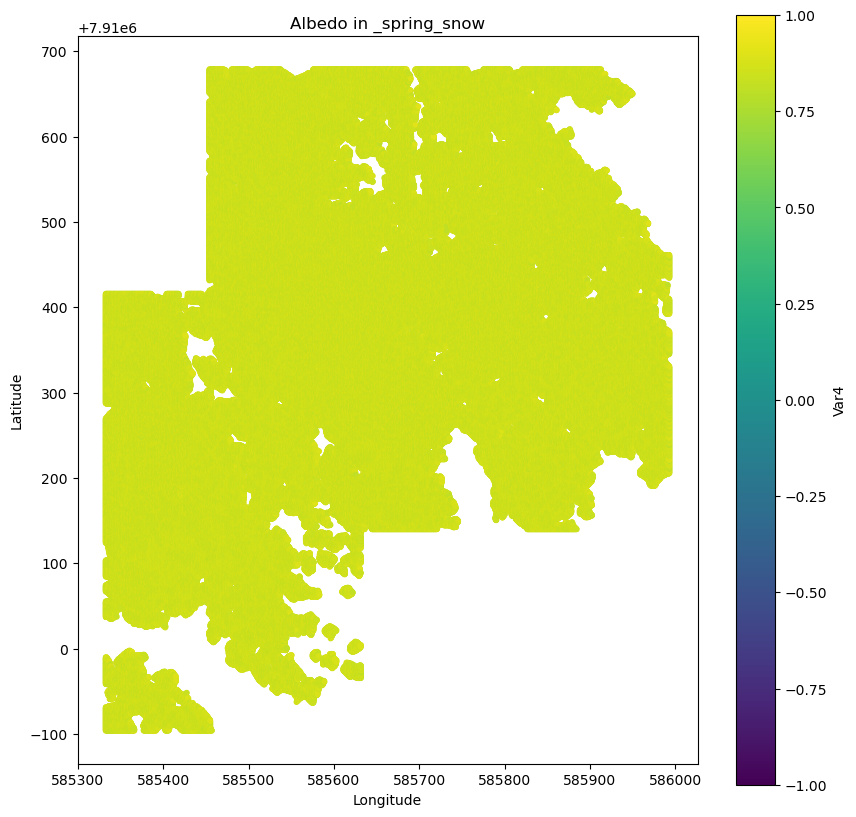

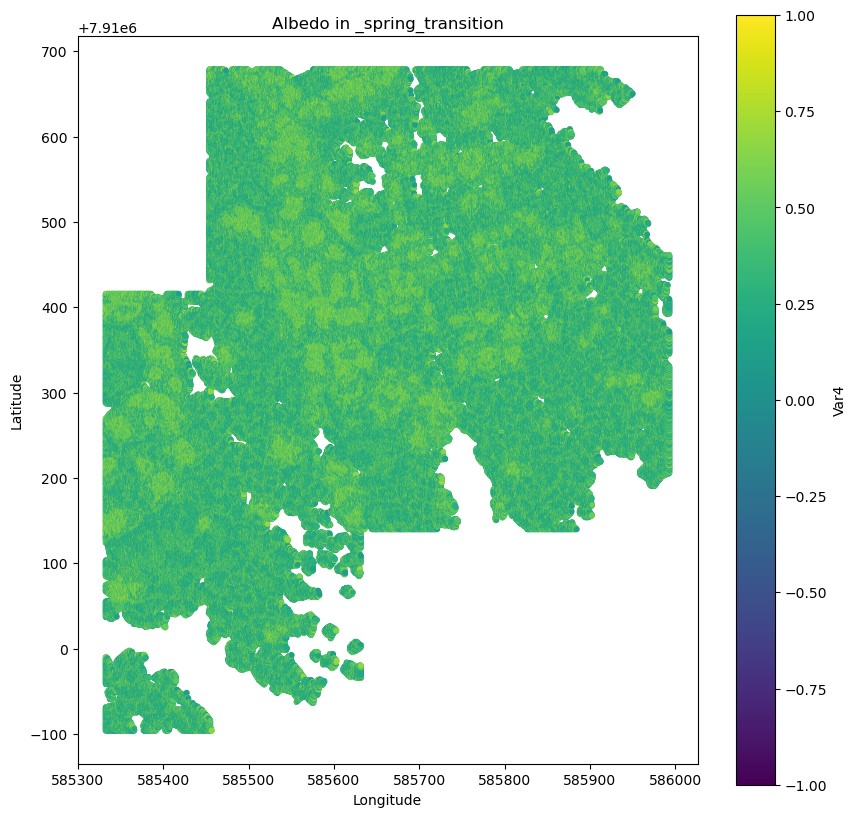

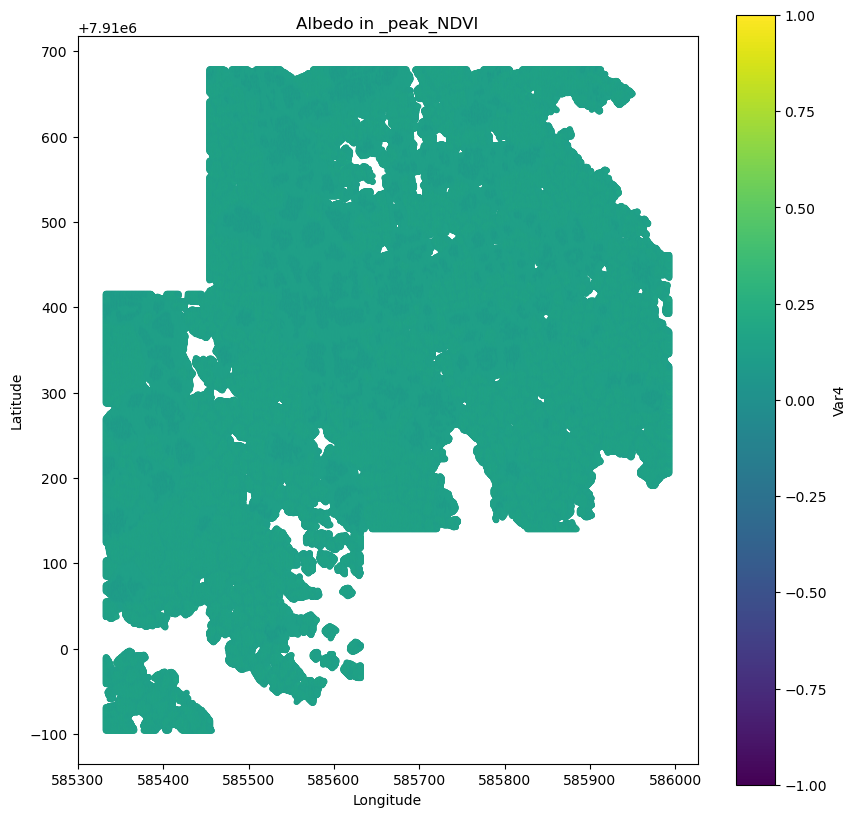

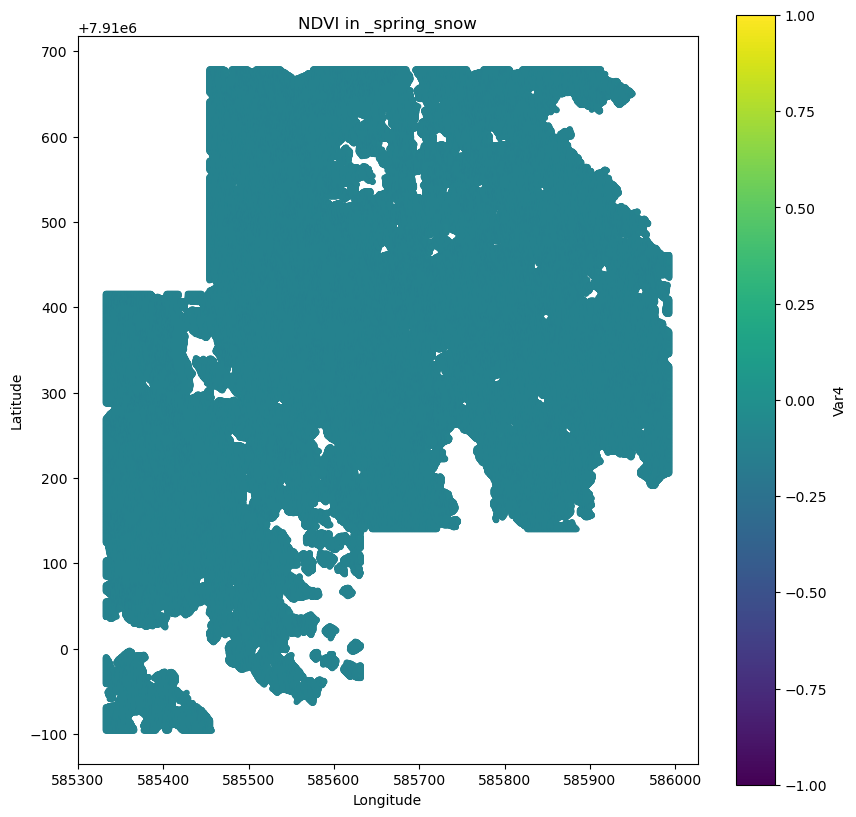

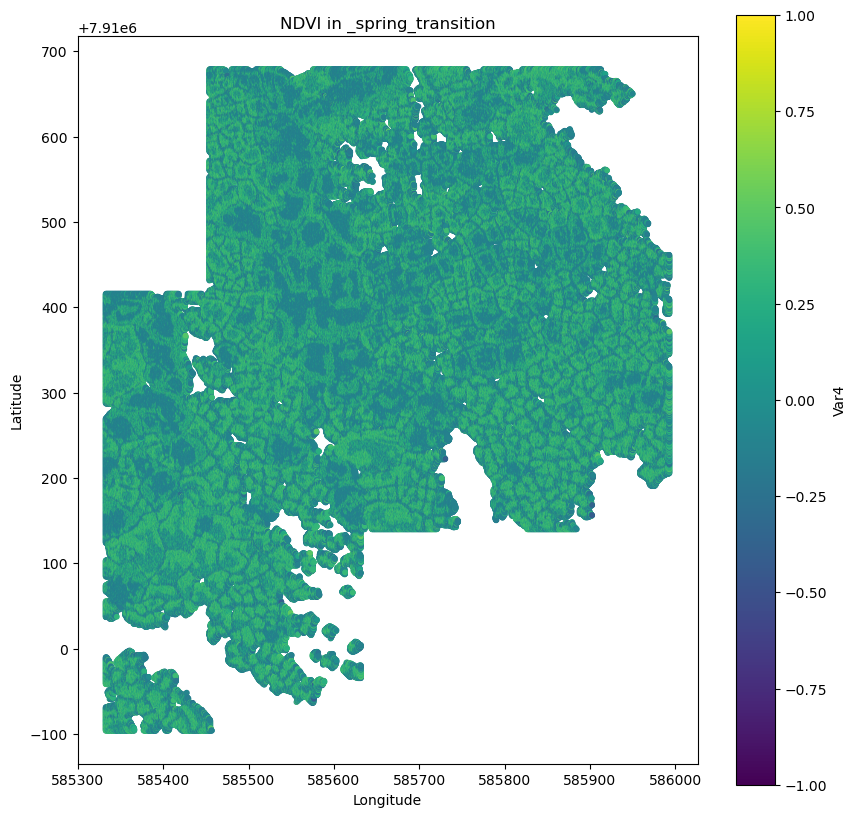

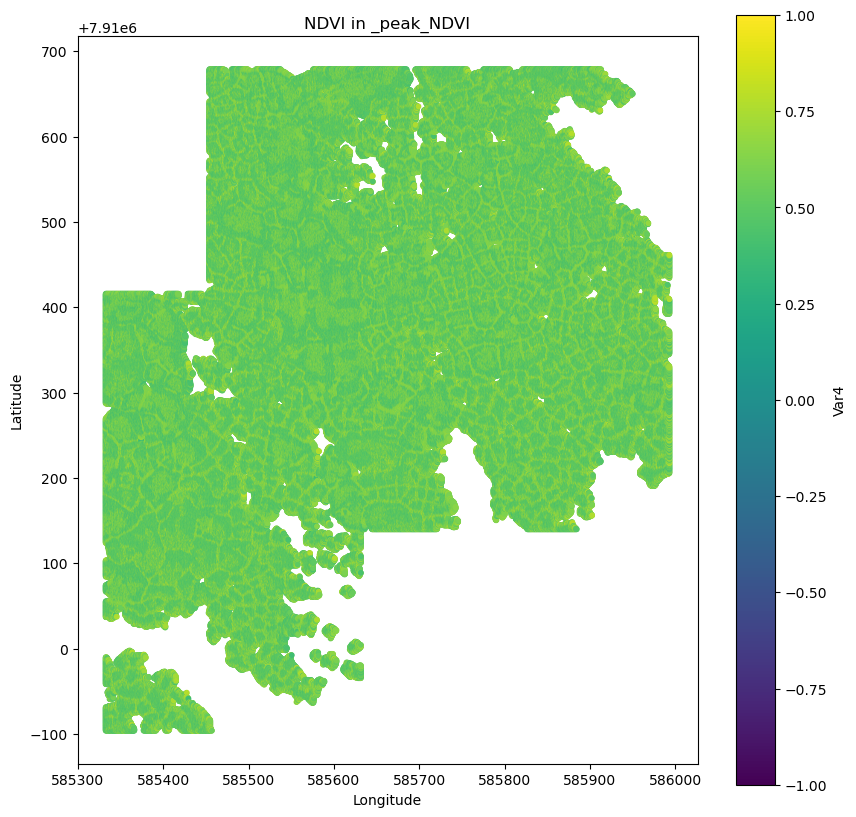

In [14]:
global_min = -1
global_max = 1

variables = ['Albedo', 'NDVI']

for variable in variables: 
    for group in group_order:
        plt.figure(figsize=(10, 10))
        filtered_df = all_data[(all_data['Variable'] == variable) & (all_data['Group'] == group)]

        scatter = plt.scatter(filtered_df['e05'], filtered_df['e06'], c=filtered_df['Var4'], cmap='viridis', s=10, vmin=global_min, vmax=global_max)
        plt.colorbar(scatter, label='Var4')
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.title(f'{variable} in {group}')
        plt.gca().set_aspect('equal', adjustable='box')
        # plt.savefig(f'plots/{variable}_{group}_{year}.png')

# What is the variability of albedo within polygonal tundra? 
1. What is the albedo of different polygon components?
2. How does albedo vary with seasonality and time? 

In [16]:
avg_per_season = all_data.groupby(['e00', 'Group', 'Variable'], as_index=False)['Var4'].mean()
avg_per_season = avg_per_season.loc[(avg_per_season['e00'] != 'High & HCP') & (avg_per_season['e00'] != 'Trough & HCP')]

filtered_albedo = avg_per_season[avg_per_season['Variable'] == 'Albedo']
filtered_albedo['Group'] = pd.Categorical(filtered_albedo['Group'], categories=group_order, ordered=True)

/var/folders/9p/2rqd7rmn3jbfmz4v57p0_0300000gp/T/ipykernel_48242/1947559736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_albedo['Group'] = pd.Categorical(filtered_albedo['Group'], categories=group_order, ordered=True)


## Albedo changes across seasons for each topo feature

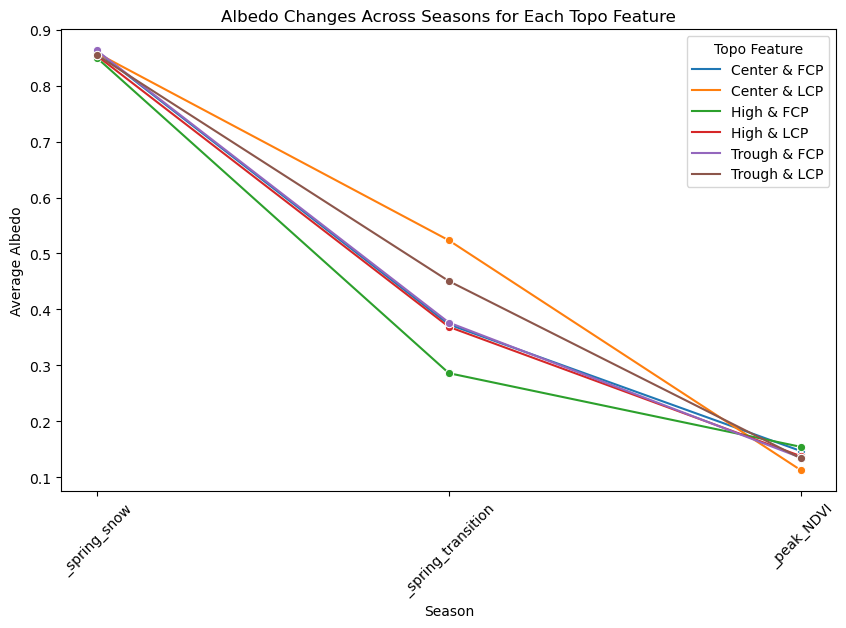

In [17]:
import seaborn as sns 


plt.figure(figsize=(10, 6))
sns.lineplot(x='Group', y='Var4', hue='e00', data=filtered_albedo, marker='o')
plt.title('Albedo Changes Across Seasons for Each Topo Feature')
plt.xlabel('Season')
plt.ylabel('Average Albedo')
plt.xticks(rotation=45)
plt.legend(title='Topo Feature')
plt.show()

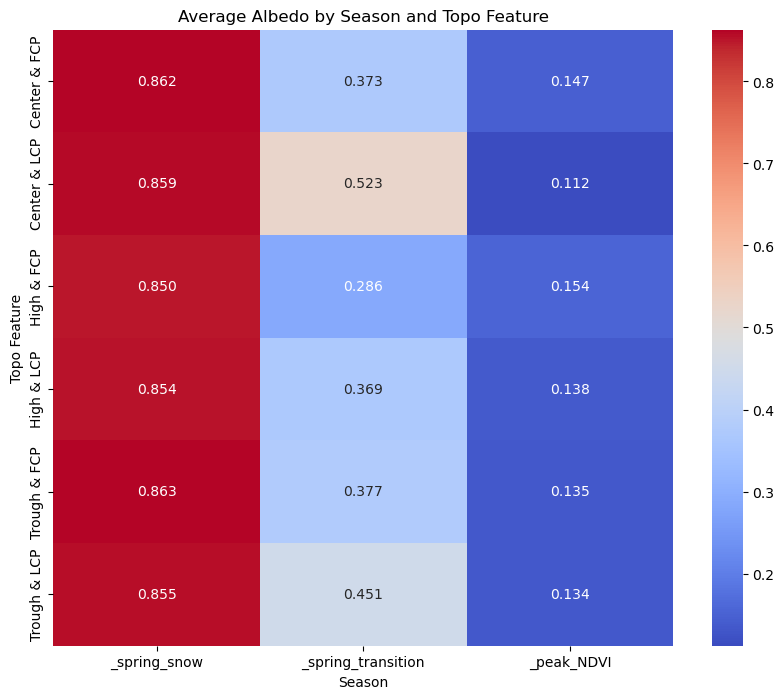

In [18]:
heatmap_data = filtered_albedo.pivot_table(index='e00', columns='Group', values='Var4', aggfunc='median')
heatmap_data = heatmap_data.reindex(columns=group_order)

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Average Albedo by Season and Topo Feature')
plt.xlabel('Season')
plt.ylabel('Topo Feature')
plt.show()